C:\Users\Admin\AppData\Local\Temp\ipykernel_39120\2857870931.py:27: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  observations = np.array([np.random.multivariate_normal(means[s], covars[s]) for s in hidden_states])


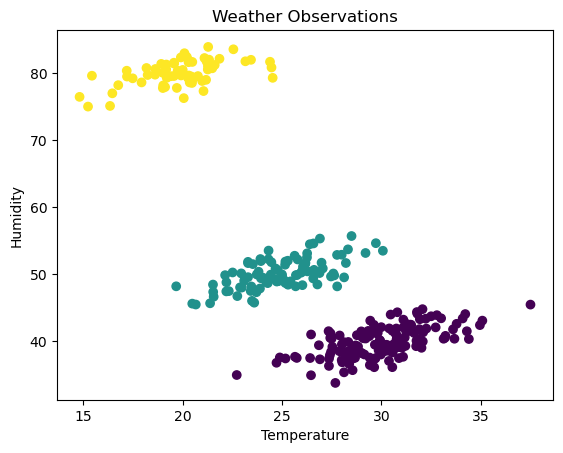

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Discrete HMM Accuracy: 0.30
Continuous HMM Accuracy: 0.11


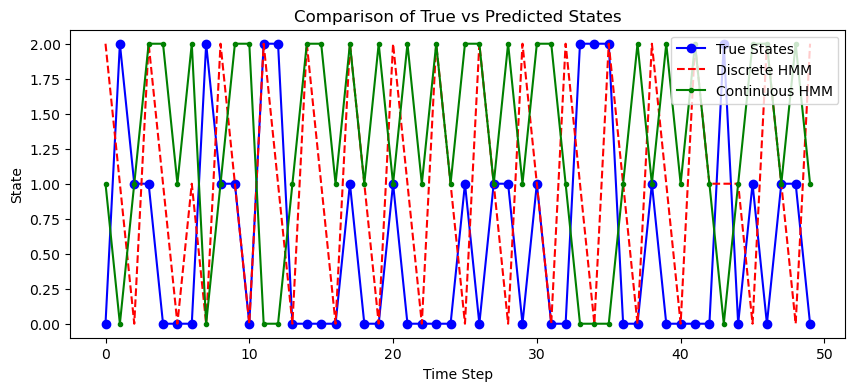

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn.hmm import CategoricalHMM, GaussianHMM
from sklearn.preprocessing import KBinsDiscretizer

# Define hidden states (Sunny, Cloudy, Rainy)
states = ["Sunny", "Cloudy", "Rainy"]
n_states = len(states)

# Transition probabilities (assumed)
trans_probs = np.array([[0.6, 0.3, 0.1], # Sunny → (Sunny, Cloudy, Rainy)
[0.2, 0.5, 0.3], # Cloudy → (Sunny, Cloudy, Rainy)
[0.1, 0.3, 0.6]]) # Rainy → (Sunny, Cloudy, Rainy)

# Emission probabilities (Temperature, Humidity range)
means = np.array([[30, 40], # Sunny (High Temp, Low Humidity)
[25, 50], # Cloudy (Medium Temp, Medium Humidity)
[20, 80]]) # Rainy (Low Temp, High Humidity)
covars = np.array([[[5, 3], [3, 5]], # Sunny (Variance)
[[4, 2], [2, 4]], # Cloudy
[[3, 5], [5, 3]]]) # Rainy

# Generate synthetic data
n_samples = 300
np.random.seed(42)
hidden_states = np.random.choice(n_states, size=n_samples, p=[0.5, 0.3, 0.2])
observations = np.array([np.random.multivariate_normal(means[s], covars[s]) for s in hidden_states])

# Plot observations
plt.scatter(observations[:, 0], observations[:, 1], c=hidden_states, cmap="viridis")
plt.xlabel("Temperature")
plt.ylabel("Humidity")
plt.title("Weather Observations")
plt.show()

# Discretizing the observations into 5 bins
discretizer = KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="uniform")
X_discrete = discretizer.fit_transform(observations).astype(int)

# Reshape for HMM (hmmlearn requires 2D input)
X_discrete = X_discrete[:, 0].reshape(-1, 1)

# Train Discrete HMM (CategoricalHMM)
hmm_discrete = CategoricalHMM(n_components=n_states, n_iter=100)
hmm_discrete.fit(X_discrete)

# Predict hidden states
hidden_preds_discrete = hmm_discrete.predict(X_discrete)

# Accuracy comparison
accuracy_discrete = np.mean(hidden_preds_discrete == hidden_states)
print(f"Discrete HMM Accuracy: {accuracy_discrete:.2f}")

# Train Continuous HMM (GaussianHMM)
hmm_continuous = GaussianHMM(n_components=n_states, covariance_type="full", n_iter=100)
hmm_continuous.fit(observations)

# Predict hidden states
hidden_preds_continuous = hmm_continuous.predict(observations)

# Accuracy comparison
accuracy_continuous = np.mean(hidden_preds_continuous == hidden_states)
print(f"Continuous HMM Accuracy: {accuracy_continuous:.2f}")

# Plot comparison
plt.figure(figsize=(10, 4))
plt.plot(hidden_states[:50], "bo-", label="True States")
plt.plot(hidden_preds_discrete[:50], "r--", label="Discrete HMM")
plt.plot(hidden_preds_continuous[:50], "g.-", label="Continuous HMM")
plt.legend()
plt.xlabel("Time Step")
plt.ylabel("State")
plt.title("Comparison of True vs Predicted States")
plt.show()
